# Determination of the HCl bond length by IR spectroscopy

### Andrew R. McCluskey

In this report, I will utilise infrared (IR) spectroscopy data from hydrochloric acid to evaluate the H-Cl bond length. 
Using IR spectroscopy, we can investigate structural features of simple molecules, and for diatomic molecules it is possible to determine molecular bond lengths using this technique.

The first step was to obtain IR spectra data from an online source. 
The IR spectrum for HCl was obtained from the [NIST Webbook](https://webbook.nist.gov/cgi/cbook.cgi?ID=C7647010&Type=IR-SPEC&Index=1#IR-SPEC), and the file modified such that it is easily read by `np.loadtxt`. 
This modification was to use the `#` character to "comment out" lines that where not relevant.
Note that the file contains five individual IR measurements for HCl, but we will investigate only the first. 

In [1]:
import numpy as np

In [2]:
exp_data = np.loadtxt('hcl_irspectrum.jdx', unpack=True)

Now we will visualise the experimental data that has be obtained. 

In [3]:
import matplotlib.pyplot as plt

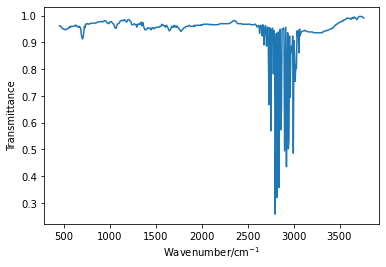

In [4]:
plt.plot(exp_data[0], exp_data[1])
plt.xlabel('Wavenumber/cm$^{-1}$')
plt.ylabel('Transmittance')
plt.show()

The region of the data that is interesting is that which is contained between wavenumbers of 2500 cm<sup>-1</sup> and 3200 cm<sup>-1</sup>. 
So we will reduce the data to obtain just that data as a pair of NumPy arrays. 

In [5]:
wavenumber = []
transmittance = []

for i, d in enumerate(exp_data[0]):
    if d > 2500.0 and d < 3200.0:
        wavenumber.append(exp_data[0][i])
        transmittance.append(exp_data[1][i])
        
wavenumber = np.array(wavenumber)
transmittance = np.array(transmittance)

We can then plot this reduced data set. 

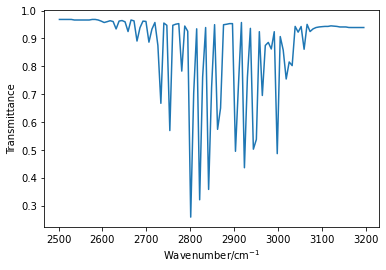

In [6]:
plt.plot(wavenumber, transmittance)
plt.xlabel('Wavenumber/cm$^{-1}$')
plt.ylabel('Transmittance')
plt.show()

In order to obtain the bond length in this molecule, we will compare the difference between the wavenumbers for the $R$-branch and the $P$-branch lines of the same rotational quantum number, $J$. 
From Atkins' Physical Chemistry, we find that the wavenumber of peaks on the $R$ branch (where $\Delta J = + 1$) are related to the rotational constant, $B$ and $J$ by the following, 

$$ \bar{\nu}_R (J) = \bar{\nu} + 2 B(J+1). $$

While for the $P$ branch (where $\Delta J = -1$) the following holds, 

$$ \bar{\nu}_P (J) = \bar{\nu} - 2 B(J+1). $$

The difference between these two gives use a function that can be used to obtain the value of $B$. 

$$ \bar{\nu}_R(J) - \bar{\nu}_P(J) = 4 B(J+1) $$

Therefore, it is necessary that we find all of the peaks in our reduced data. 
However, currently our data are not peaks, but dips, as we are investigating the transmittance. 
We can convert from transmittance to absorbance by subtracting the transmittance from $1$.

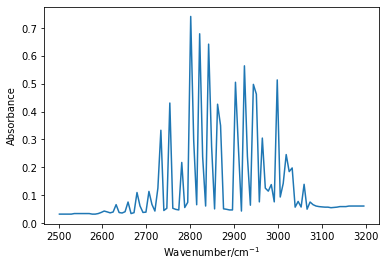

In [7]:
absorbance = 1 - transmittance
plt.plot(wavenumber, absorbance)
plt.xlabel('Wavenumber/cm$^{-1}$')
plt.ylabel('Absorbance')
plt.show()

It was possible to find a simple peak finding function, in the SciPy module by searching online.

In [8]:
from scipy.signal import find_peaks

In [9]:
result = find_peaks(absorbance)

In [10]:
result

(array([ 7, 15, 19, 23, 26, 30, 34, 37, 41, 44, 47, 50, 53, 59, 62, 65, 68,
        71, 73, 76, 78, 80, 82, 84]),
 {})

This function returns the peak indices and some `properties` object. 
We only want the first item of these. 

In [11]:
peak_indices = result[0]
peaks = []
for i in peak_indices:
    peaks.append(wavenumber[i])
peaks = np.array(peaks)

Now let's check that the peaks we have found match visually our data. 

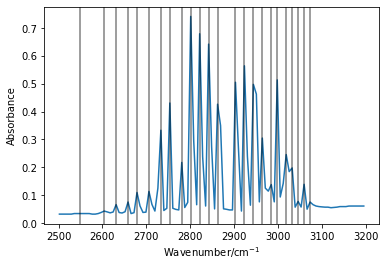

In [12]:
plt.plot(wavenumber, absorbance)
for p in peaks:
    plt.axvline(p, 0, 1, color='k', alpha=0.5)
plt.xlabel('Wavenumber/cm$^{-1}$')
plt.ylabel('Absorbance')
plt.show() 

There appear to be a good match, with a gap just below 2900 cm<sup>-1</sup>. 
To the right hand side of this gap we have the $R$-branch, while the left hand side is the $P$-branch. 
There are 11 peaks in the $R$-branch region, these will be the last 11 values in the `peaks` array.
These correspond to values of $J$ from $0$ to $10$.

In [13]:
nu_R = peaks[-11:]

In [14]:
nu_R

array([2902.400917, 2922.755825, 2943.110732, 2963.46564 , 2983.820548,
       2997.390487, 3017.745395, 3031.315333, 3044.885272, 3058.455211,
       3072.025149])

We want to then fined similar values for the $P$ branch. 
However, we note that there is no peak for $\bar{\nu}_P(0)$ as this is an forbidden transition, as a $P$-branch transition from $J=0$ would end up in $J=-1$. 
Therefore we only have 10 $P$ branch peaks, which correspond to $J$-values of $1$ to $10$. 
Additionally, the order of these must be flipped such that they are ordered outwards from the gap.

In [15]:
nu_P = peaks[-21:-11][::-1]

In [16]:
nu_P

array([2861.691101, 2841.336193, 2820.981285, 2800.626377, 2780.271469,
       2753.131592, 2732.776684, 2705.636807, 2678.49693 , 2658.142022])

Let us now plot the reduced data, indicating the $R$-branch peaks in orange and the $P$-branch peaks in green.

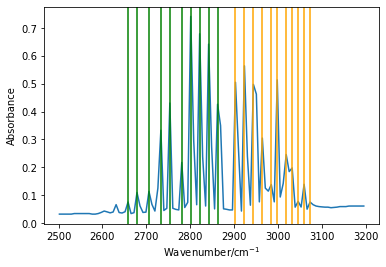

In [17]:
plt.plot(wavenumber, absorbance)
for p in nu_R:
    plt.axvline(p, 0, 1, color='orange')
for p in nu_P:
    plt.axvline(p, 0, 1, color='green')
plt.xlabel('Wavenumber/cm$^{-1}$')
plt.ylabel('Absorbance')
plt.show() 

We will now find the difference between the $R$- and $P$-branch peaks, note that we ignore the first value in the $R$-branch as there is no corresponding value in the $P$-branch. 

In [18]:
difference = nu_R[1:] - nu_P

Plotting this difference against $J+1$ should give a linear relationship with a gradient of $4B$.

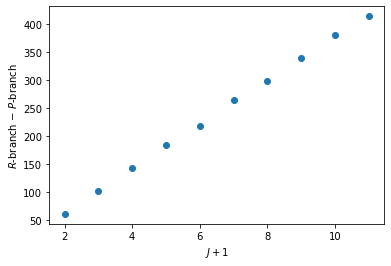

In [19]:
plt.plot(range(2, 12), difference, 'o')
plt.xlabel('$J+1$')
plt.ylabel('$R$-branch $-$ $P$-branch')
plt.show()

We can find the slope of this data using another `scipy` function called `linregress`. 

In [20]:
from scipy.stats import linregress

In [21]:
result = linregress(range(2, 12), difference)

In [22]:
gradient = result.slope

In [23]:
B = gradient / 4

The units are cm<sup>-1</sup> for the rotational constant.

In [24]:
print(B, 'cm^-1')

9.848485742424241 cm^-1


The rotational constant $B$ is related to the inertia by the following relationship, 

$$ B = \frac{\hbar}{4\pi c I}, $$

where, $c$ is the speed of light, $\hbar$ is the reduced Planck constant and $I$ is the inertia. 
Assuming the molecule is acting as a rigid-rotor, the inertia is related to the bond length $R$ as follows, 

$$ I = \mu R^2, $$

where $\mu$ is the reduced mass. 

This means that the bond length can be found form the following rearranged equation.

$$ R = \sqrt{\frac{\hbar}{4\pi c \mu B}}. $$

First we will find the redued mass of HCl, importing the proton mass constant.

In [25]:
from scipy.constants import proton_mass

m_H = 1.0079 * proton_mass
m_Cl = 35.45 * proton_mass

In [26]:
mu = m_H * m_Cl / (m_H + m_Cl)

The bond length can then be found, importing the speed of light (and converting to cms<sup>-1</sup>) and the reduced Planck constant.

In [27]:
from scipy.constants import c
from scipy.constants import hbar

c_cm = c * 100

R = np.sqrt(hbar / (4 * np.pi * c_cm * mu * B))
print(R, 'm')

1.3167949631424204e-10 m


So, we have found the bond length for the HCl molecule to be about $1.32$ Å.